# Predicting the income band of a person based on census data

This data was extracted from the census bureau database. The prediction task is to determine the income level for the person represented by the record. Incomes have been binned at the $50K level to present a binary classification problem.


## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import data and column names

In [2]:
column_names = pd.read_csv('column_names.csv', names = ['name', 'description'])
column_names

,name,description
0,AAGE,age
1,ACLSWKR,class of worker
2,ADTIND,industry code
3,ADTOCC,occupation code
4,AHGA,education
5,AHRSPAY,wage per hour
6,AHSCOL,enrolled in edu inst last wk
7,AMARITL,marital status
8,AMJIND,major industry code
9,AMJOCC,major occupation code


In [3]:
df = pd.read_csv('census-income.data', names = column_names['name'])
df.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,INCBAND
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


## Exploratory data analysis

In [4]:
# Number of rows/observations and columns/variables
df.shape

(199523, 42)

In [5]:
# The data are weighted through the MARSUPWT variable
df['MARSUPWT'].describe()

count    199523.000000
mean       1740.380269
std         993.768156
min          37.870000
25%        1061.615000
50%        1618.310000
75%        2188.610000
max       18656.300000
Name: MARSUPWT, dtype: float64

In [6]:
# The 199,523 records should correspond approximately to the total US population
int(df['MARSUPWT'].sum())

347245892

In [7]:
# The target variable is the income band (INCBAND) which is binary
df['INCBAND'].unique()

array([' - 50000.', ' 50000+.'], dtype=object)

In [8]:
# Change the format of the values of the target
df['INCBAND'].replace([' 50000+.', ' - 50000.'], ['A', 'B'], inplace=True)

In [9]:
# The data are imbalanced with respect to the classes of the target variable
df['INCBAND'].value_counts()

B    187141
A     12382
Name: INCBAND, dtype: int64

In [10]:
# The corresponding weighted values for the size of the classes of the target
print('A weighted', int(round(df[df['INCBAND']=='A']['MARSUPWT'].sum())))
print('B weighted', int(round(df[df['INCBAND']=='B']['MARSUPWT'].sum())))

A weighted 22241245
B weighted 325004647


The age distribution for each income band

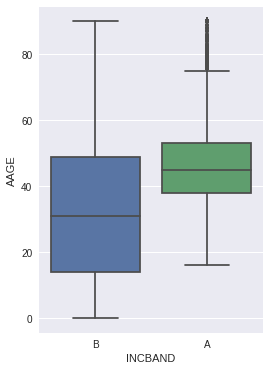

In [11]:
plt.figure(figsize=(4, 6))
sns.boxplot(y='AAGE', x='INCBAND', data=df)

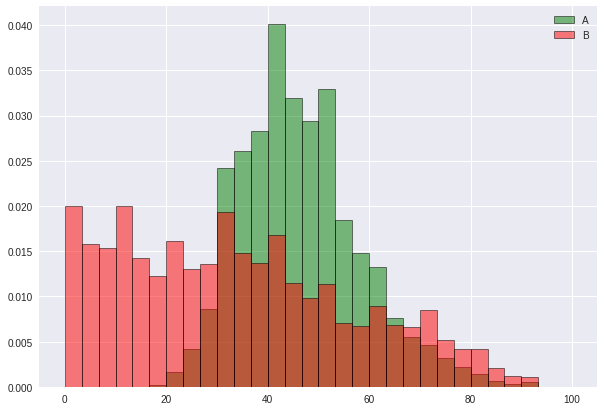

In [12]:
fig, axes = plt.subplots(1, figsize=(10, 7))
axes.hist(df[df['INCBAND']=='A']['AAGE'], bins=30, range=(0,100), normed=True, color='green', edgecolor='black', alpha = 0.5, linewidth=1, label='A')
axes.hist(df[df['INCBAND']=='B']['AAGE'], bins=30, range=(0,100), normed=True, color='red', edgecolor='black', alpha = 0.5, linewidth=1, label='B')
axes.legend()

In [13]:
# People below 16 years old don't have income and are not supposed to work
# so class A (50+) is not expected to have people below 16 years
df[df['INCBAND']=='A']['AAGE'].describe()

count    12382.000000
mean        46.266193
std         11.830906
min         16.000000
25%         38.000000
50%         45.000000
75%         53.000000
max         90.000000
Name: AAGE, dtype: float64

In [14]:
# I can safely assume that all people below 16 years old belong to the B class (50-) 
# regardless from their characteristics so I can reject them from the sample to build my predictive model 
df = df[df['AAGE']>=16]

In [15]:
# Analysis will be carried out on data for the adult population which is
int(df['MARSUPWT'].sum())

263235210

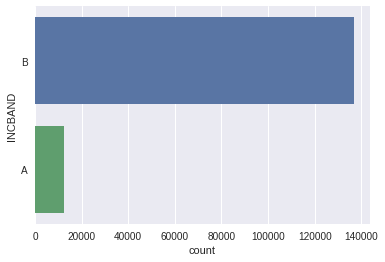

In [16]:
# The data is not balanced with respect to the target. 
# The majority class is those with income below 50000 (Class B)
sns.countplot(y='INCBAND', data=df)

In [17]:
vc = df['INCBAND'].value_counts()
print(vc)
print('B:A =', int(round(vc[0]/vc[1])),': 1')

B    136793
A     12382
Name: INCBAND, dtype: int64
B:A = 11 : 1


In [18]:
# To balance the data, I downsampled the majority class B
# The minority class A has 12382 instances

from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['INCBAND']=='B']
df_minority = df[df['INCBAND']=='A']
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=12382,  # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df['INCBAND'].value_counts()

A    12382
B    12382
Name: INCBAND, dtype: int64

In [19]:
# The unique values for each variable
for col in df.columns:
    print(column_names[column_names['name']==col]['description'], '\n', col, '\n')
    print(df[col].unique(), '\n')

0    age
Name: description, dtype: object 
 AAGE 

[67 47 69 30 26 53 23 20 31 18 72 45 55 17 40 37 73 78 63 56 64 34 50 61 35
 42 24 60 41 46 16 49 48 68 39 28 79 66 57 44 58 75 70 22 19 36 62 85 33 27
 71 51 74 43 59 52 81 77 25 38 80 32 29 65 84 89 76 86 21 90 83 82 87 54 88] 

1    class of worker
Name: description, dtype: object 
 ACLSWKR 

[' Private' ' Self-employed-not incorporated' ' Not in universe'
 ' Local government' ' State government' ' Self-employed-incorporated'
 ' Federal government' ' Without pay' ' Never worked'] 

2    industry code
Name: description, dtype: object 
 ADTIND 

[35  2 36 42 22  4  0 33 43 19 41 45 44 50 39  9 32  5 13 31 14 37 18 34 25
  8 49 47 28 16 24 11 27 29 48 30 40 21  1 46 15  7 38 12 17 23  3 10  6 26
 51 20] 

3    occupation code
Name: description, dtype: object 
 ADTOCC 

[26 43 27 38 41 34  0 24 12 29 39  8 31 30 19 16 33 23 32 17  2  3 36 44 37
  4 10 22  1  9 28 35 42 14 18 25 11  7 15 13 45 40  5  6 21 20 46] 

4    education
Name: de

 WKSWORK 

[52 32 35  0 13  3 16  8 38 10 47 48 30 50 46 40 44 17  1 26 36 15 12 20 28
 39  4 45 22 18 24  2 42  5 11 51 41  6 27 21 43 34 37 25 49 29  9 33 19 14
 23  7 31] 

40    year
Name: description, dtype: object 
 YEAR 

[94 95] 

41    income band
Name: description, dtype: object 
 INCBAND 

['B' 'A'] 



In [20]:
# All values have leading spaces which I can remove
# for col in df.columns:
    # df[col] = df[col].apply(str)
    # df[col] = df[col].str.strip()

In [21]:
# The missing values in each category appear with different code names
# I replaced them all with the word "missing" for consistency
df.replace({' Not in universe':'missing', ' Not in universe or children':'missing', ' Other':'missing', 
            ' All other':'missing',' Do not know':'missing', ' NA':'missing', ' ?':'missing', 
            ' Not in universe under 1 year old':'missing'}, inplace=True)

In [22]:
# The total number of observations
df.shape[0]

24764

In [23]:
# A table with the metadata of the variables/columns
# the name of the variable, the description, the data type of the column, the proportion of missing values,
# the number of unique values, a list of the unique values for each variable

a = []
t = df.shape[0]

for col in df.columns:
    a.append([col, 
              column_names[column_names['name']==col]['description'].values[0],
              df[col].dtype,
              int((df[df[col].isin(['missing'])]['AAGE'].count())/t*100), 
              df[col].nunique(), 
              df[col].unique()])
    
var_mdata = pd.DataFrame(a, columns = ['name','description','dtype','miss_rate','nvalues','values'])
var_mdata.head()

,name,description,dtype,miss_rate,nvalues,values
0,AAGE,age,int64,0,75,"[67, 47, 69, 30, 26, 53, 23, 20, 31, 18, 72, 4..."
1,ACLSWKR,class of worker,object,21,9,"[ Private, Self-employed-not incorporated, mi..."
2,ADTIND,industry code,int64,0,52,"[35, 2, 36, 42, 22, 4, 0, 33, 43, 19, 41, 45, ..."
3,ADTOCC,occupation code,int64,0,47,"[26, 43, 27, 38, 41, 34, 0, 24, 12, 29, 39, 8,..."
4,AHGA,education,object,0,16,"[ Some college but no degree, High school gra..."


In [24]:
# Sort table by the missing rate
var_mdata.sort_values(by='miss_rate', ascending=False)

,name,description,dtype,miss_rate,nvalues,values
37,VETQVA,fill inc questionnaire for veteran's admin,object,98,3,"[missing, No, Yes]"
31,PARENT,family members under 18,object,97,5,"[missing, Neither parent present, Father onl..."
14,AUNTYPE,reason for unemployment,object,97,6,"[missing, Re-entrant, Job loser - on layoff,..."
6,AHSCOL,enrolled in edu inst last wk,object,95,3,"[missing, High school, College or university]"
21,GRINST,state of previous residence,object,93,50,"[ New Mexico, missing, California, Abroad, ..."
29,MIGSUN,migration prev res in sunbelt,object,93,3,"[ No, missing, Yes]"
20,GRINREG,region of previous residence,object,93,6,"[ Northeast, missing, West, Abroad, Midwest..."
11,AREORGN,hispanic Origin,object,91,8,"[missing, Mexican (Mexicano), Mexican-Americ..."
13,AUNMEM,member of a labor union,object,84,3,"[ No, missing, Yes]"
25,MIGMTR1,migration code-change in msa,object,51,9,"[ MSA to MSA, missing, Nonmover, Abroad to n..."


In [25]:
# Drop variables with missing rate above 50%
drop_var = var_mdata[var_mdata['miss_rate']>=50]['name'].values
df = df.drop(drop_var, 1)
df.shape

(24764, 29)

In [26]:
# Create a new table with the metadata of the variables/columns

a = []
t = df.shape[0]

for col in df.columns:
    a.append([col, 
              column_names[column_names['name']==col]['description'].values[0],
              df[col].dtype,
              int((df[df[col].isin(['missing'])]['AAGE'].count())/t*100), 
              df[col].nunique(), 
              df[col].unique()])
    
var_mdata = pd.DataFrame(a, columns = ['name','description','dtype','miss_rate','nvalues','values'])

In [27]:
# Metadata for variables that remained in the dataset
var_mdata.sort_values(by='miss_rate', ascending=False)

,name,description,dtype,miss_rate,nvalues,values
7,AMJIND,major industry code,object,21,24,"[ Finance insurance and real estate, Agricult..."
8,AMJOCC,major occupation code,object,21,15,"[ Adm support including clerical, Farming for..."
1,ACLSWKR,class of worker,object,21,9,"[ Private, Self-employed-not incorporated, mi..."
20,PEFNTVTY,country of birth father,object,4,42,"[missing, United-States, Haiti, England, M..."
21,PEMNTVTY,country of birth mother,object,3,43,"[missing, United-States, Haiti, Mexico, Ch..."
22,PENATVTY,country of birth self,object,2,43,"[ United-States, missing, Haiti, Mexico, Ph..."
9,ARACE,mace,object,1,5,"[ White, Black, Asian or Pacific Islander, ..."
0,AAGE,age,int64,0,75,"[67, 47, 69, 30, 26, 53, 23, 20, 31, 18, 72, 4..."
17,HHDREL,detailed household summary in household,object,0,8,"[ Householder, Spouse of householder, Child ..."
27,YEAR,year,int64,0,2,"[94, 95]"


In [28]:
# The following variables have missing values and may be considered for imputation
var_mdata[var_mdata['miss_rate']>0].sort_values(by='miss_rate', ascending=False)

,name,description,dtype,miss_rate,nvalues,values
1,ACLSWKR,class of worker,object,21,9,"[ Private, Self-employed-not incorporated, mi..."
7,AMJIND,major industry code,object,21,24,"[ Finance insurance and real estate, Agricult..."
8,AMJOCC,major occupation code,object,21,15,"[ Adm support including clerical, Farming for..."
20,PEFNTVTY,country of birth father,object,4,42,"[missing, United-States, Haiti, England, M..."
21,PEMNTVTY,country of birth mother,object,3,43,"[missing, United-States, Haiti, Mexico, Ch..."
22,PENATVTY,country of birth self,object,2,43,"[ United-States, missing, Haiti, Mexico, Ph..."
9,ARACE,mace,object,1,5,"[ White, Black, Asian or Pacific Islander, ..."


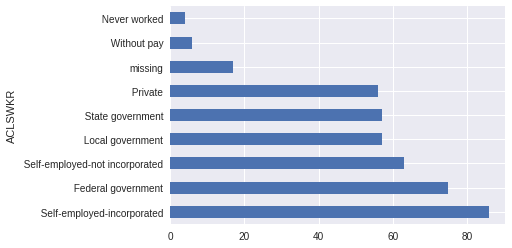

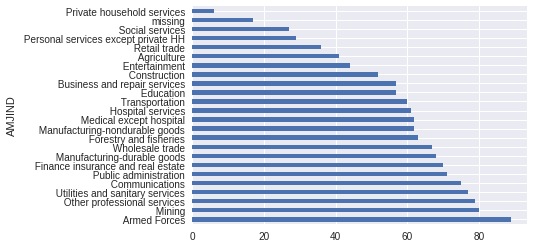

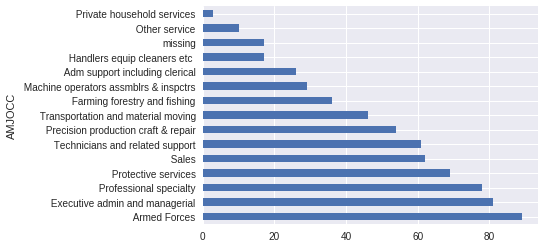

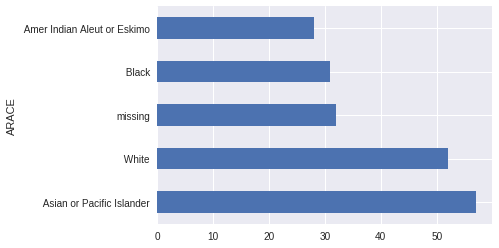

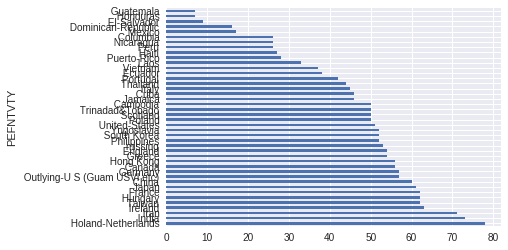

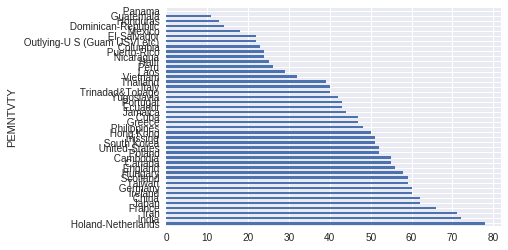

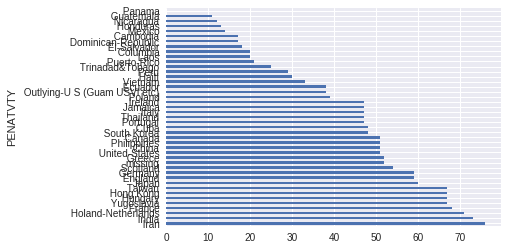

In [29]:
for n in var_mdata[var_mdata['miss_rate']>0]['name']:
    pivt = df.pivot_table(values='AAGE',index=[n],columns=['INCBAND'],aggfunc='count')
    pivt['T'] = pivt['A'] + pivt['B']
    pivt['A/T'] = round(pivt['A']/pivt['T']*100)
    pivt.sort_values(by='A/T', ascending=False, inplace=True)
    plt.figure()
    pivt['A/T'].plot.barh()

In [30]:
for n in var_mdata[var_mdata['miss_rate']>0]['name']:
    pivt = df.pivot_table(values='AAGE',index=[n],columns=['INCBAND'],aggfunc='count')
    pivt['T'] = pivt['A'] + pivt['B']
    pivt['A/T'] = round(pivt['A']/pivt['T']*100)
    pivt.sort_values(by='A/T', ascending=False, inplace=True)
    print(pivt, '\n\n')

INCBAND                             A     B      T   A/T
ACLSWKR                                                 
 Self-employed-incorporated      1134   183   1317  86.0
 Federal government               597   201    798  75.0
 Self-employed-not incorporated  1090   639   1729  63.0
 Local government                 847   646   1493  57.0
 State government                 485   362    847  57.0
 Private                         7322  5814  13136  56.0
missing                           904  4478   5382  17.0
 Without pay                        1    15     16   6.0
 Never worked                       2    44     46   4.0 


INCBAND                                  A     B     T   A/T
AMJIND                                                      
 Armed Forces                            8     1     9  89.0
 Mining                                146    37   183  80.0
 Other professional services          1044   284  1328  79.0
 Utilities and sanitary services       256    78   334  77.0
 Com

In [31]:
# Given that the country variables have too many categorical levels and are heavily imbalanced 
# these variables will be dropped from the dataset: PEFNTVTY PEMNTVTY PENATVTY
# The ARACE variable will also be dropped because it's heavily imbalanced and doesn't seem to affect the target
# AMJIND has too many categorical variables but AMJOCC seems to be a summary/aggregation of the AMJIND levels

# Drop variables
df = df.drop(['PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'ARACE', 'AMJIND'], 1)
df.shape

(24764, 24)

In [32]:
# Create a new table with the metadata of the variables/columns

a = []
t = df.shape[0]

for col in df.columns:
    a.append([col, 
              column_names[column_names['name']==col]['description'].values[0],
              df[col].dtype,
              int((df[df[col].isin(['missing'])]['AAGE'].count())/t*100), 
              df[col].nunique(), 
              df[col].unique()])
    
var_mdata = pd.DataFrame(a, columns = ['name','description','dtype','miss_rate','nvalues','values'])

In [33]:
# The following variables have missing values and may be considered for imputation
var_mdata[var_mdata['miss_rate']>0].sort_values(by='miss_rate', ascending=False)

,name,description,dtype,miss_rate,nvalues,values
1,ACLSWKR,class of worker,object,21,9,"[ Private, Self-employed-not incorporated, mi..."
7,AMJOCC,major occupation code,object,21,15,"[ Adm support including clerical, Farming for..."


In [34]:
# Variable netadata sorted by number of unique values
var_mdata.sort_values(by='nvalues', ascending=False)

,name,description,dtype,miss_rate,nvalues,values
16,MARSUPWT,instance weight,float64,0,18548,"[978.25, 3249.15, 1154.41, 784.11, 1920.09, 54..."
12,DIVVAL,divdends from stocks,int64,0,784,"[0, 50, 3039, 600, 1000, 27, 3000, 385, 500, 2..."
5,AHRSPAY,wage per hour,int64,0,434,"[400, 0, 1532, 1030, 630, 769, 800, 1000, 1001..."
10,CAPGAIN,capital gains,int64,0,113,"[7978, 0, 2329, 2961, 2290, 1455, 5455, 1086, ..."
11,CAPLOSS,capital losses,int64,0,91,"[0, 1573, 1408, 1977, 1590, 1844, 1980, 1719, ..."
0,AAGE,age,int64,0,75,"[67, 47, 69, 30, 26, 53, 23, 20, 31, 18, 72, 4..."
21,WKSWORK,weeks worked in year,int64,0,53,"[52, 32, 35, 0, 13, 3, 16, 8, 38, 10, 47, 48, ..."
2,ADTIND,industry code,int64,0,52,"[35, 2, 36, 42, 22, 4, 0, 33, 43, 19, 41, 45, ..."
3,ADTOCC,occupation code,int64,0,47,"[26, 43, 27, 38, 41, 34, 0, 24, 12, 29, 39, 8,..."
14,HHDFMX,detailed household and family stat,object,0,29,"[ Nonfamily householder, Householder, Spouse..."


### Numerical variables

In [35]:
num_var = list(var_mdata[var_mdata['nvalues']>52]['name'])
num_var

['AAGE', 'AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'MARSUPWT', 'WKSWORK']

In [36]:
# For this exercise I will drop the instance weight variable and build my model using the unweighted data
num_var = ['AAGE', 'AHRSPAY', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 'WKSWORK']

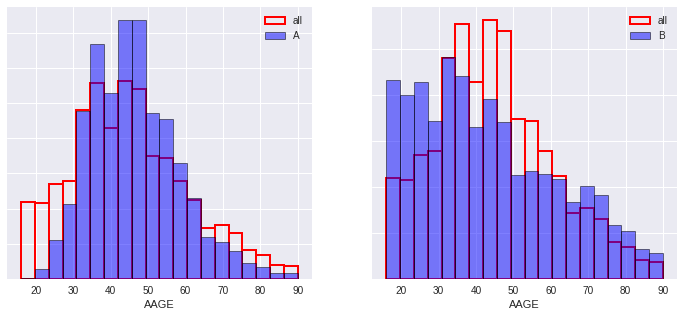

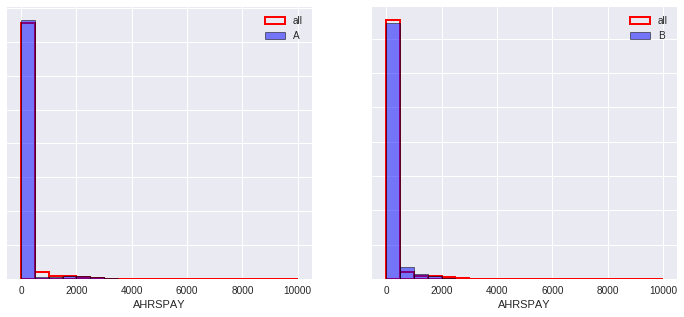

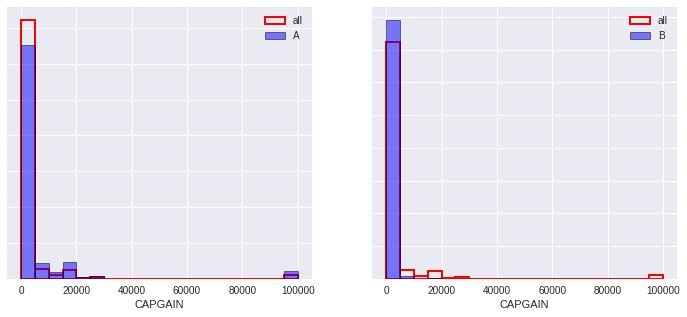

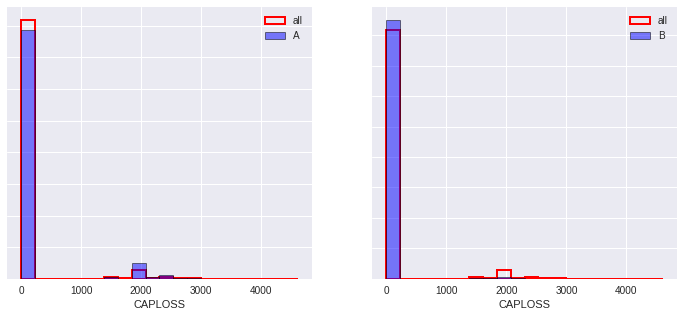

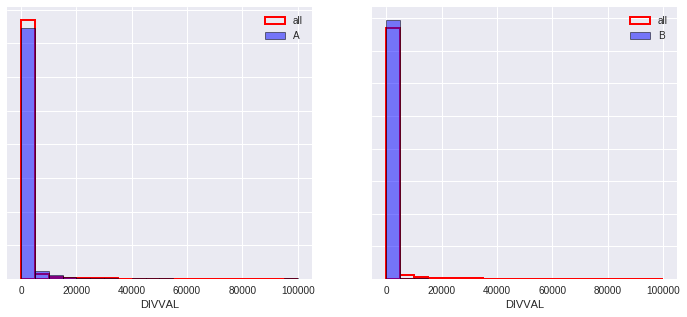

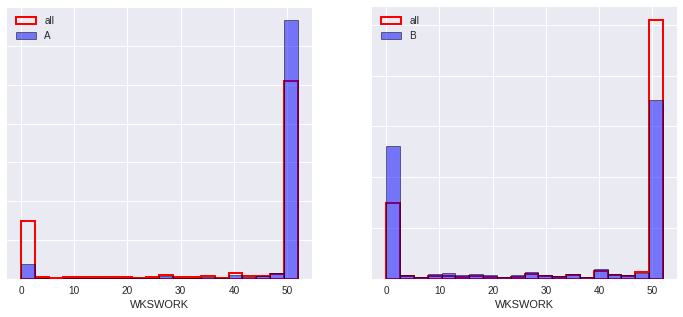

In [37]:
for v in num_var:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    minx = min(df[v])
    maxx = max(df[v])
    for n, i in zip([0,1], ['A','B']):
        axes[n].hist(df[v], bins=20, range=(minx,maxx), normed=True, edgecolor='red', facecolor="None", linewidth=2, label='all')
        axes[n].hist(df[df['INCBAND']==i][v], bins=20, range=(minx,maxx), normed=True, color='blue', edgecolor='black', alpha = 0.5, linewidth=1, label=i)
        #axes[c].set_xlim([minx, maxx])
        axes[n].set_yticklabels([])
        axes[n].legend()
        axes[n].set_xlabel(str(v))

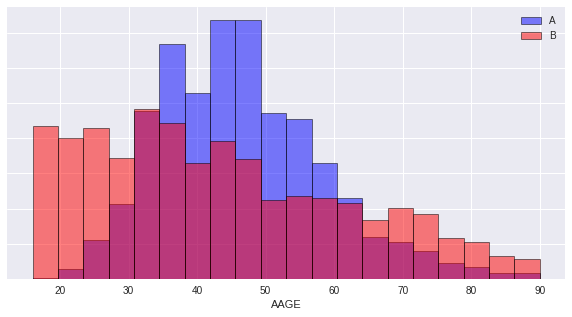

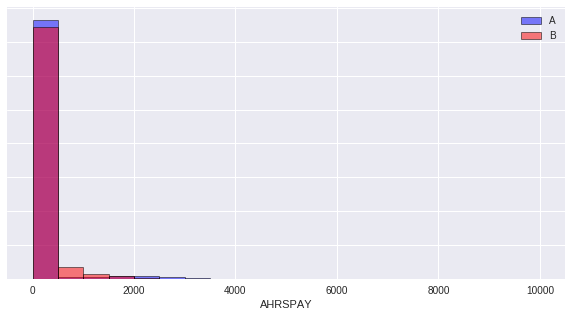

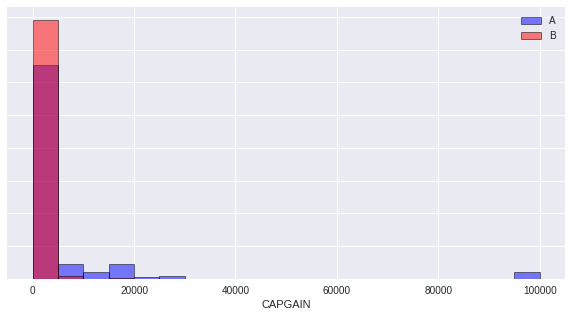

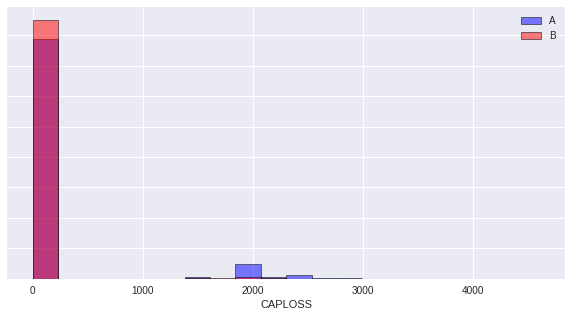

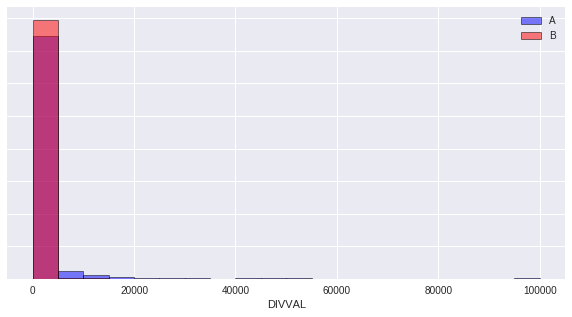

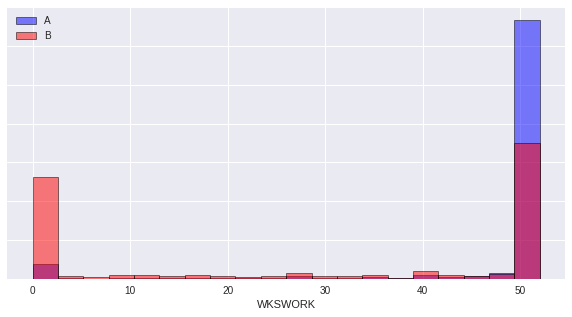

In [38]:
for v in num_var:
    fig, axes = plt.subplots(1, figsize=(10, 5))
    minx = min(df[v])
    maxx = max(df[v])
    axes.hist(df[df['INCBAND']=='A'][v], bins=20, range=(minx,maxx), normed=True, color='blue', edgecolor='black', alpha = 0.5, linewidth=1, label='A')
    axes.hist(df[df['INCBAND']=='B'][v], bins=20, range=(minx,maxx), normed=True, color='red', edgecolor='black', alpha = 0.5, linewidth=1, label='B')
    #axes[c].set_xlim([minx, maxx])
    axes.set_yticklabels([])
    axes.legend()
    axes.set_xlabel(str(v))

In [39]:
# From the numerical variables it seems that 'AAGE' and 'WKSWORK' are more strongly associated with the income band
# So we will keep only:
num_var = ['AAGE', 'WKSWORK']

Given the distribution of the 'WKSWORK' variable, it's better to transform it.

In [40]:
def wkswork(weeks):
    if weeks == 52:
        return '52'
    elif weeks == 0:
        return '0'
    else:
        return '1_51' 

df['WKSWORK'] = df['WKSWORK'].apply(wkswork)
df['WKSWORK'].value_counts()

52      15788
0        4723
1_51     4253
Name: WKSWORK, dtype: int64

In [41]:
pivt = df.pivot_table(values='AAGE',index=['WKSWORK'],columns=['INCBAND'],aggfunc='count')
pivt['T'] = pivt['A'] + pivt['B']
pivt['A/T'] = round(pivt['A']/pivt['T']*100)
pivt.sort_values(by='A/T', ascending=False)

INCBAND,A,B,T,A/T
WKSWORK,,,,
52,10407,5381,15788,66.0
1_51,1379,2874,4253,32.0
0,596,4127,4723,13.0


### Categorical variables

In [42]:
cat_var = list(var_mdata[var_mdata['nvalues']<=52]['name'])
cat_var

['ACLSWKR',
 'ADTIND',
 'ADTOCC',
 'AHGA',
 'AMARITL',
 'AMJOCC',
 'ASEX',
 'AWKSTAT',
 'FILESTAT',
 'HHDFMX',
 'HHDREL',
 'NOEMP',
 'PRCITSHP',
 'SEOTR',
 'VETYN',
 'YEAR',
 'INCBAND']

In [43]:
# 'ADTIND' and 'ADTOCC' will be dropped because they have a large number of categorical levels that cannot be regrouped
# 'YEAR' will be dropped because it doesn't provide any useful information 
# and it's not statistically significant with respect to income band
# 'INCBAND' is just the target

cat_var = ['ACLSWKR','AHGA','AMARITL','AMJOCC','ASEX','AWKSTAT',
           'FILESTAT','HHDFMX','HHDREL','NOEMP','PRCITSHP','SEOTR','VETYN']

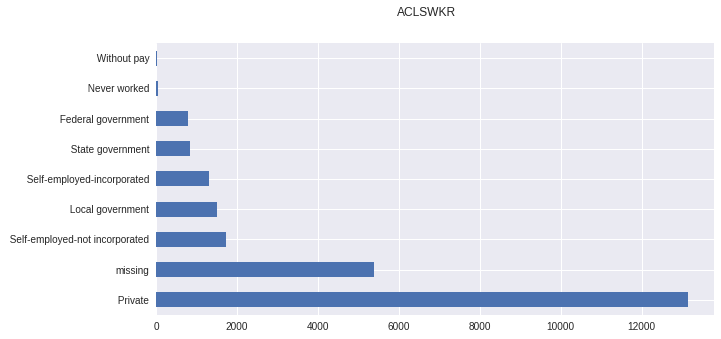

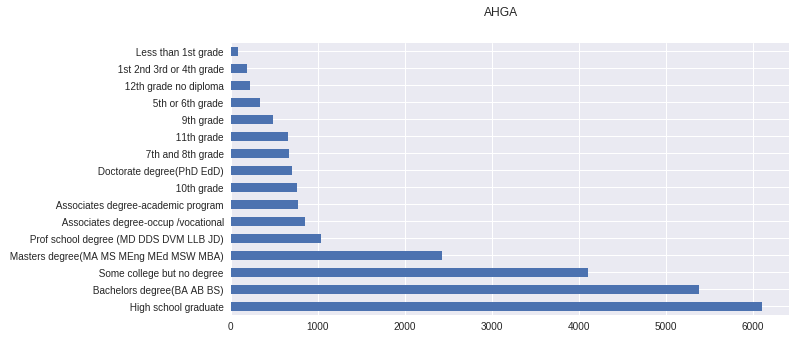

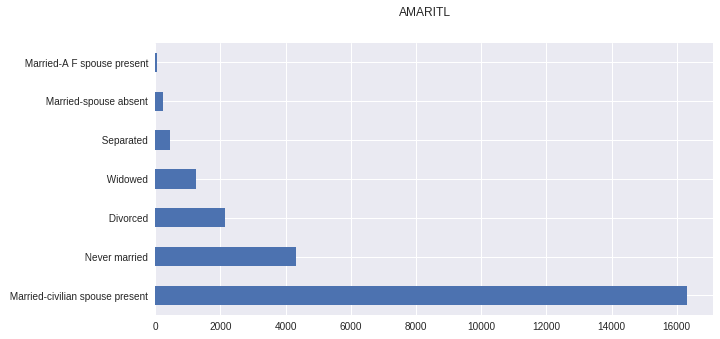

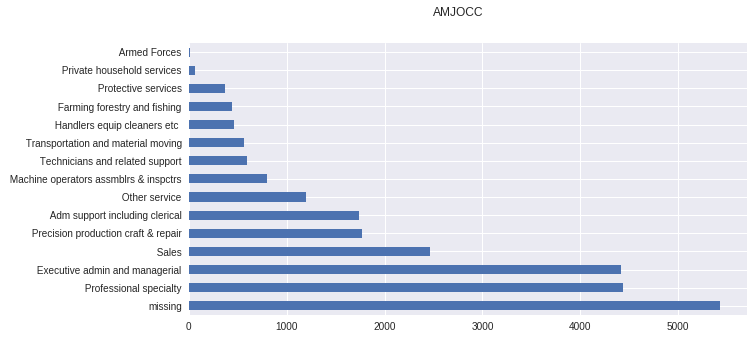

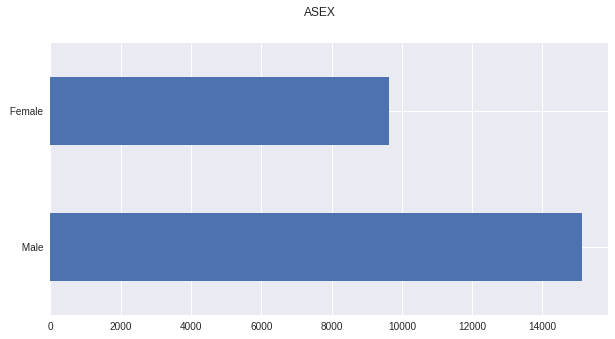

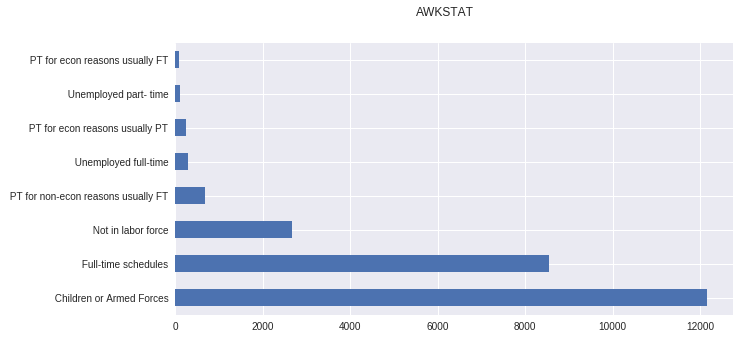

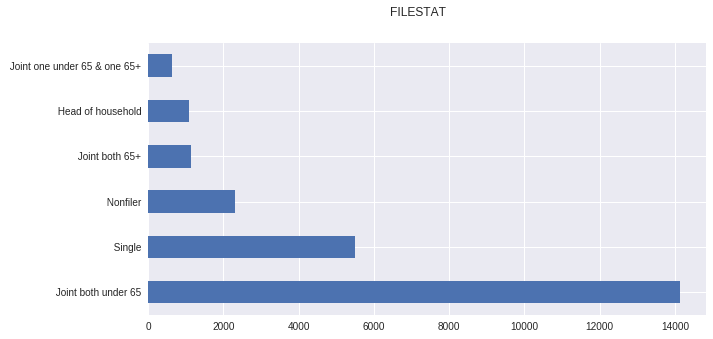

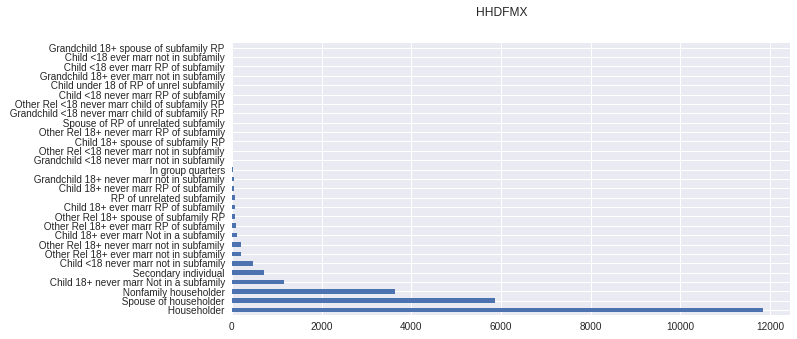

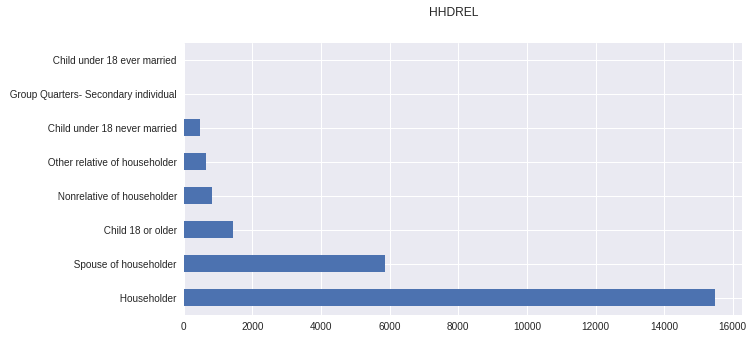

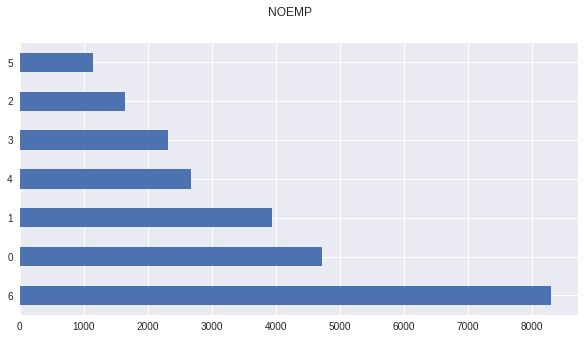

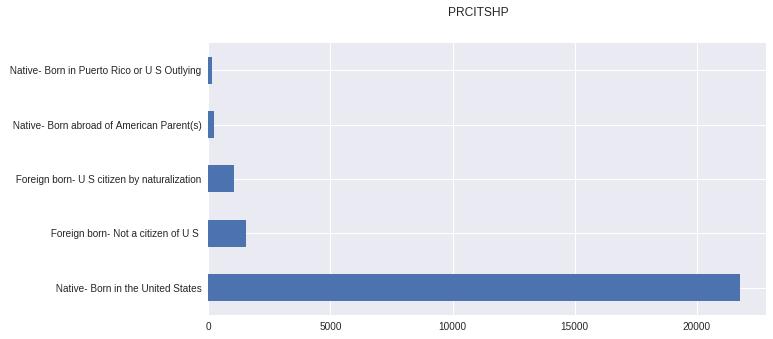

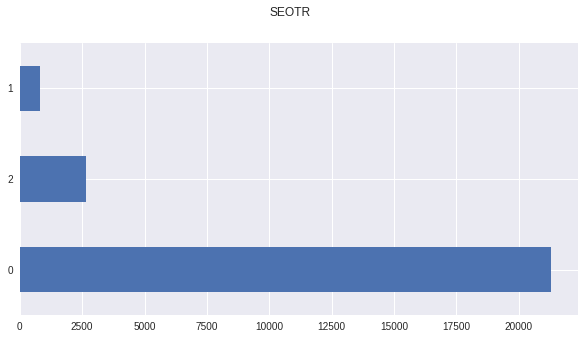

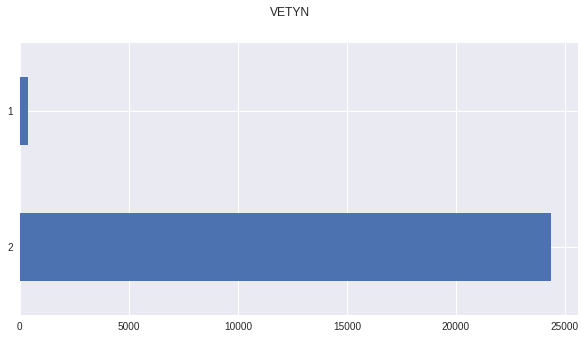

In [44]:
for col in cat_var:
    plt.figure(figsize=(10, 5)).suptitle(col)
    df[col].value_counts().plot.barh()

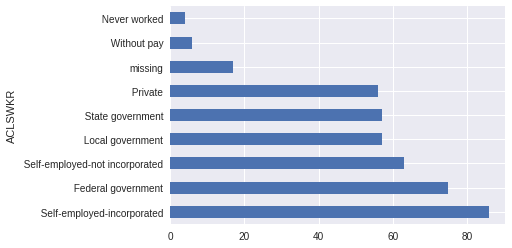

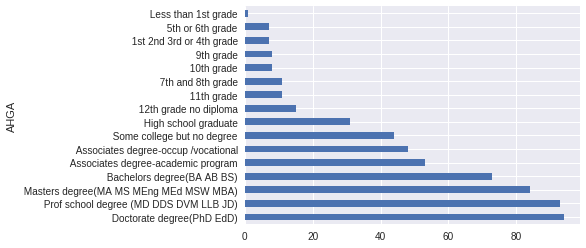

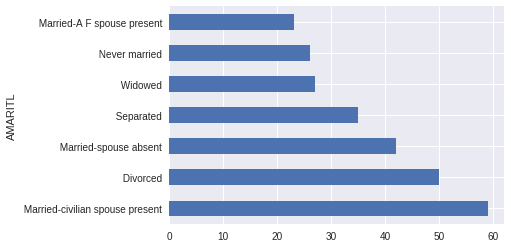

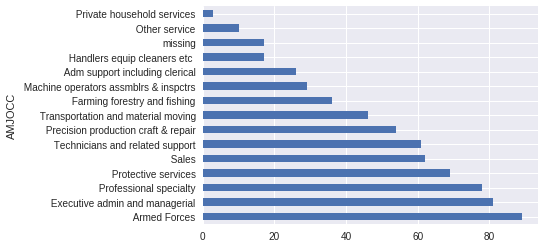

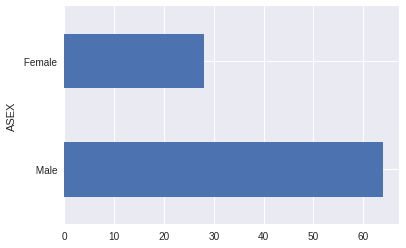

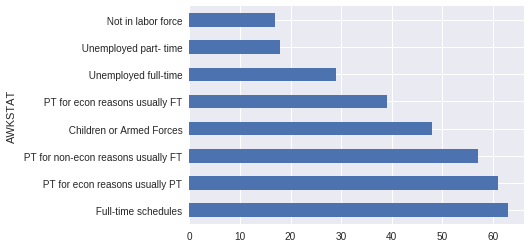

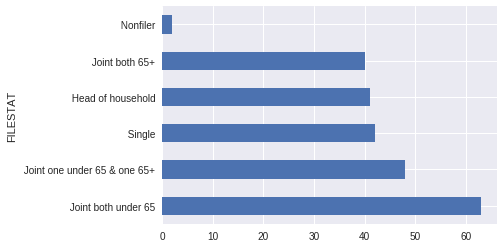

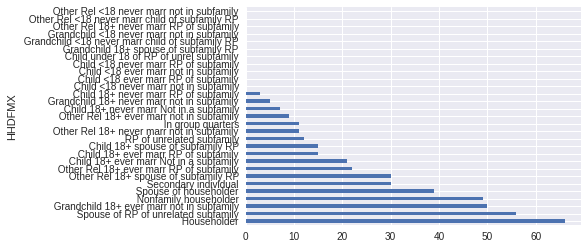

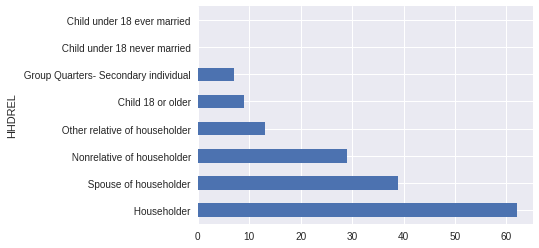

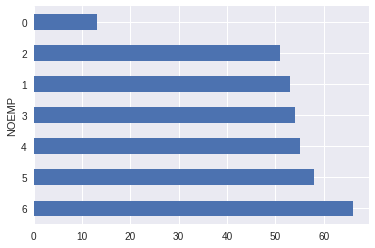

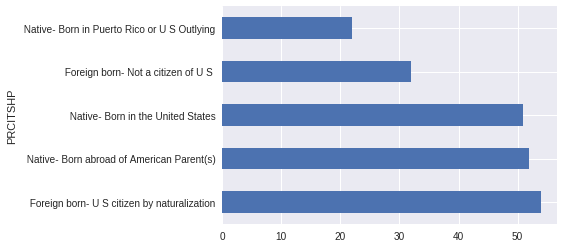

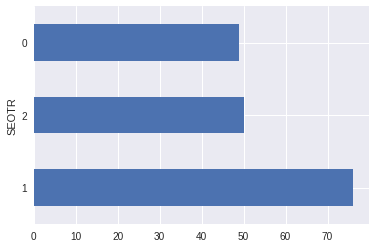

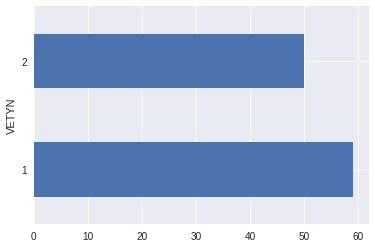

In [45]:
for n in cat_var:
    pivt = df.pivot_table(values='AAGE',index=[n],columns=['INCBAND'],aggfunc='count')
    pivt['T'] = pivt['A'] + pivt['B']
    pivt['A/T'] = round(pivt['A']/pivt['T']*100)
    pivt.sort_values(by='A/T', ascending=False, inplace=True)
    plt.figure()
    pivt['A/T'].plot.barh()

In [46]:
for n in cat_var:
    pivt = df.pivot_table(values='AAGE',index=[n],columns=['INCBAND'],aggfunc='count')
    pivt['T'] = pivt['A'] + pivt['B']
    pivt['A/T'] = round(pivt['A']/pivt['T']*100)
    pivt.sort_values(by='A/T', ascending=False, inplace=True)
    print(column_names[column_names['name']==n]['description'], '\n')
    print(pivt, '\n\n')

1    class of worker
Name: description, dtype: object 

INCBAND                             A     B      T   A/T
ACLSWKR                                                 
 Self-employed-incorporated      1134   183   1317  86.0
 Federal government               597   201    798  75.0
 Self-employed-not incorporated  1090   639   1729  63.0
 Local government                 847   646   1493  57.0
 State government                 485   362    847  57.0
 Private                         7322  5814  13136  56.0
missing                           904  4478   5382  17.0
 Without pay                        1    15     16   6.0
 Never worked                       2    44     46   4.0 


4    education
Name: description, dtype: object 

INCBAND                                     A     B     T   A/T
AHGA                                                           
 Doctorate degree(PhD EdD)                657    45   702  94.0
 Prof school degree (MD DDS DVM LLB JD)   969    70  1039  93.0
 Masters

30    num persons worked for employer
Name: description, dtype: object 

INCBAND     A     B     T   A/T
NOEMP                          
6        5480  2826  8306  66.0
5         665   476  1141  58.0
4        1470  1211  2681  55.0
3        1240  1077  2317  54.0
1        2093  1856  3949  53.0
2         838   809  1647  51.0
0         596  4127  4723  13.0 


35    citizenship
Name: description, dtype: object 

INCBAND                                           A      B      T   A/T
PRCITSHP                                                               
 Foreign born- U S citizen by naturalization    580    485   1065  54.0
 Native- Born abroad of American Parent(s)      128    117    245  52.0
 Native- Born in the United States            11149  10611  21760  51.0
 Foreign born- Not a citizen of U S             492   1049   1541  32.0
 Native- Born in Puerto Rico or U S Outlying     33    120    153  22.0 


36    own business or self employed
Name: description, dtype: object 

INCBA

In [47]:
# Categorical variables that will feed into the model
cat_var = ['AHGA', 'AMARITL', 'ASEX', 'HHDREL']

In [48]:
num_var

['AAGE', 'WKSWORK']

### Regroup categorical variables

** Education **

In [49]:
n='AHGA'
pivt = df.pivot_table(values='AAGE',index=[n],columns=['INCBAND'],aggfunc='count')
pivt['T'] = pivt['A'] + pivt['B']
pivt['A/T'] = round(pivt['A']/pivt['T']*100)
print(column_names[column_names['name']==n]['description'].values[0], '\n')
pivt.sort_values(by='A/T', ascending=False)

education 



INCBAND,A,B,T,A/T
AHGA,,,,
Doctorate degree(PhD EdD),657,45,702,94.0
Prof school degree (MD DDS DVM LLB JD),969,70,1039,93.0
Masters degree(MA MS MEng MEd MSW MBA),2038,385,2423,84.0
Bachelors degree(BA AB BS),3915,1461,5376,73.0
Associates degree-academic program,412,360,772,53.0
Associates degree-occup /vocational,413,441,854,48.0
Some college but no degree,1787,2320,4107,44.0
High school graduate,1879,4229,6108,31.0
12th grade no diploma,34,186,220,15.0


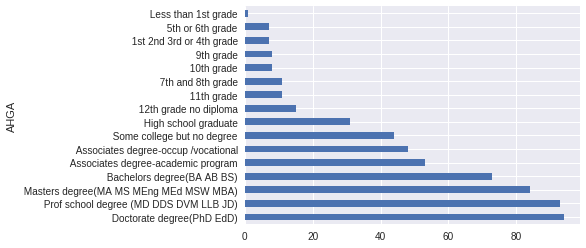

In [50]:
n='AHGA'
pivt = df.pivot_table(values='AAGE',index=[n],columns=['INCBAND'],aggfunc='count')
pivt['T'] = pivt['A'] + pivt['B']
pivt['A/T'] = round(pivt['A']/pivt['T']*100)
pivt.sort_values(by='A/T', ascending=False, inplace=True)
plt.figure()
pivt['A/T'].plot.barh()

In [51]:
df['AHGA'].unique()

array([' Some college but no degree', ' High school graduate',
       ' 1st 2nd 3rd or 4th grade', ' 10th grade',
       ' Bachelors degree(BA AB BS)', ' 7th and 8th grade',
       ' Less than 1st grade', ' 11th grade',
       ' Associates degree-occup /vocational', ' 5th or 6th grade',
       ' Masters degree(MA MS MEng MEd MSW MBA)', ' 9th grade',
       ' Associates degree-academic program', ' Doctorate degree(PhD EdD)',
       ' Prof school degree (MD DDS DVM LLB JD)', ' 12th grade no diploma'], dtype=object)

In [52]:
def ahga(edu_level):
    
    if edu_level in [' Less than 1st grade',
                     ' 1st 2nd 3rd or 4th grade', 
                     ' 5th or 6th grade', 
                     ' 7th and 8th grade', 
                     ' 9th grade',
                     ' 10th grade',
                     ' 11th grade',
                     ' 12th grade no diploma']:
        return 'below_hschool'
    
    elif edu_level == ' High school graduate':
        return 'hschool_grad'
    
    elif edu_level == ' Some college but no degree':
        return 'colg_nodegree' 
    
    elif edu_level in [' Associates degree-occup /vocational',
                       ' Associates degree-academic program']:
        return 'assoc_degree'
    
    elif edu_level == ' Bachelors degree(BA AB BS)':
        return 'bachelor'
    
    elif edu_level == ' Masters degree(MA MS MEng MEd MSW MBA)':
        return 'master'
    
    elif edu_level in [' Doctorate degree(PhD EdD)',
                       ' Prof school degree (MD DDS DVM LLB JD)']:
        return 'above_master'

df['AHGA'] = df['AHGA'].apply(ahga)
df['AHGA'].value_counts() 

hschool_grad     6108
bachelor         5376
colg_nodegree    4107
below_hschool    3383
master           2423
above_master     1741
assoc_degree     1626
Name: AHGA, dtype: int64

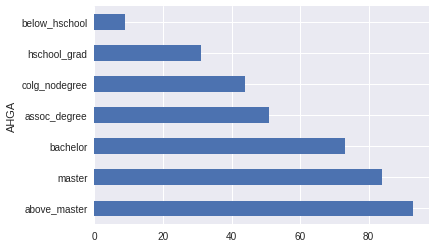

In [53]:
n='AHGA'
pivt = df.pivot_table(values='AAGE',index=[n],columns=['INCBAND'],aggfunc='count')
pivt['T'] = pivt['A'] + pivt['B']
pivt['A/T'] = round(pivt['A']/pivt['T']*100)
pivt.sort_values(by='A/T', ascending=False, inplace=True)
plt.figure()
pivt['A/T'].plot.barh()

** Marital status **

In [54]:
n='AMARITL'
pivt = df.pivot_table(values='AAGE',index=[n],columns=['INCBAND'],aggfunc='count')
pivt['T'] = pivt['A'] + pivt['B']
pivt['A/T'] = round(pivt['A']/pivt['T']*100)
print(column_names[column_names['name']==n]['description'].values[0], '\n')
pivt.sort_values(by='A/T', ascending=False)

marital status 



INCBAND,A,B,T,A/T
AMARITL,,,,
Married-civilian spouse present,9600,6703,16303,59.0
Divorced,1066,1081,2147,50.0
Married-spouse absent,96,133,229,42.0
Separated,158,298,456,35.0
Widowed,330,911,1241,27.0
Never married,1117,3206,4323,26.0
Married-A F spouse present,15,50,65,23.0


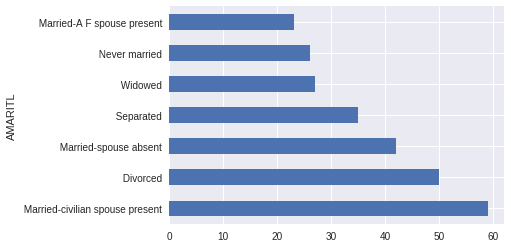

In [55]:
n='AMARITL'
pivt = df.pivot_table(values='AAGE',index=[n],columns=['INCBAND'],aggfunc='count')
pivt['T'] = pivt['A'] + pivt['B']
pivt['A/T'] = round(pivt['A']/pivt['T']*100)
pivt.sort_values(by='A/T', ascending=False, inplace=True)
plt.figure()
pivt['A/T'].plot.barh()

In [56]:
df['AMARITL'].unique()

array([' Divorced', ' Married-civilian spouse present', ' Widowed',
       ' Never married', ' Separated', ' Married-spouse absent',
       ' Married-A F spouse present'], dtype=object)

In [57]:
def amaritl(marital):
    
    if marital == ' Married-civilian spouse present':
        return 'married'
    
    elif marital == ' Divorced':
        return 'divorced'
    
    else:
        return 'no_spouse' 

df['AMARITL'] = df['AMARITL'].apply(amaritl)
df['AMARITL'].value_counts() 

married      16303
no_spouse     6314
divorced      2147
Name: AMARITL, dtype: int64

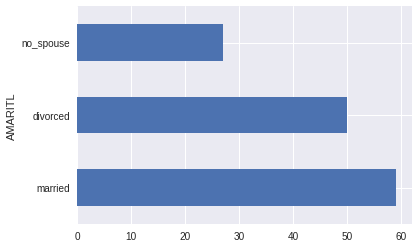

In [58]:
n='AMARITL'
pivt = df.pivot_table(values='AAGE',index=[n],columns=['INCBAND'],aggfunc='count')
pivt['T'] = pivt['A'] + pivt['B']
pivt['A/T'] = round(pivt['A']/pivt['T']*100)
pivt.sort_values(by='A/T', ascending=False, inplace=True)
plt.figure()
pivt['A/T'].plot.barh()

** Household **

In [59]:
n='HHDREL'
pivt = df.pivot_table(values='AAGE',index=[n],columns=['INCBAND'],aggfunc='count')
pivt['T'] = pivt['A'] + pivt['B']
pivt['A/T'] = round(pivt['A']/pivt['T']*100)
print(column_names[column_names['name']==n]['description'].values[0], '\n')
pivt.sort_values(by='A/T', ascending=False)

detailed household summary in household 



INCBAND,A,B,T,A/T
HHDREL,,,,
Householder,9651.0,5837.0,15488.0,62.0
Spouse of householder,2282.0,3594.0,5876.0,39.0
Nonrelative of householder,234.0,584.0,818.0,29.0
Other relative of householder,86.0,570.0,656.0,13.0
Child 18 or older,126.0,1311.0,1437.0,9.0
Group Quarters- Secondary individual,1.0,14.0,15.0,7.0
Child under 18 never married,2.0,469.0,471.0,0.0
Child under 18 ever married,NaN,3.0,NaN,NaN


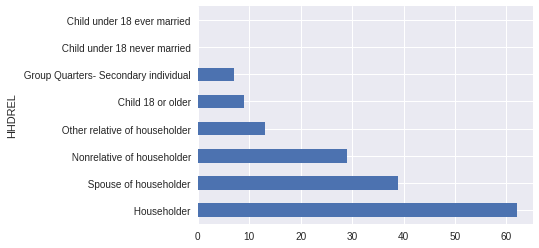

In [60]:
n='HHDREL'
pivt = df.pivot_table(values='AAGE',index=[n],columns=['INCBAND'],aggfunc='count')
pivt['T'] = pivt['A'] + pivt['B']
pivt['A/T'] = round(pivt['A']/pivt['T']*100)
pivt.sort_values(by='A/T', ascending=False, inplace=True)
plt.figure()
pivt['A/T'].plot.barh()

In [61]:
df['HHDREL'].unique()

array([' Householder', ' Spouse of householder', ' Child 18 or older',
       ' Other relative of householder', ' Child under 18 never married',
       ' Nonrelative of householder',
       ' Group Quarters- Secondary individual',
       ' Child under 18 ever married'], dtype=object)

In [62]:
# Drop these 3 cases where the household status of the person is ' Child under 18 ever married'
df = df[df['HHDREL']!=' Child under 18 ever married']

In [63]:
def hhdrel(household):
    
    if household == ' Householder':
        return 'householder'
    
    elif household == ' Spouse of householder':
        return 'spouse'
    
    elif household in [' Other relative of householder', ' Nonrelative of householder']:
        return 'other_nonhholder'
    
    else:
        return 'child' 

df['HHDREL'] = df['HHDREL'].apply(hhdrel)
df['HHDREL'].value_counts() 

householder         15488
spouse               5876
child                1923
other_nonhholder     1474
Name: HHDREL, dtype: int64

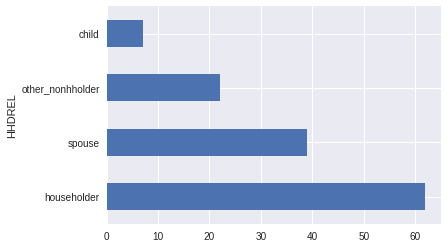

In [64]:
n='HHDREL'
pivt = df.pivot_table(values='AAGE',index=[n],columns=['INCBAND'],aggfunc='count')
pivt['T'] = pivt['A'] + pivt['B']
pivt['A/T'] = round(pivt['A']/pivt['T']*100)
pivt.sort_values(by='A/T', ascending=False, inplace=True)
plt.figure()
pivt['A/T'].plot.barh()

** Sex **

In [65]:
n='ASEX'
pivt = df.pivot_table(values='AAGE',index=[n],columns=['INCBAND'],aggfunc='count')
pivt['T'] = pivt['A'] + pivt['B']
pivt['A/T'] = round(pivt['A']/pivt['T']*100)
print(column_names[column_names['name']==n]['description'].values[0], '\n')
pivt.sort_values(by='A/T', ascending=False)

sex 



INCBAND,A,B,T,A/T
ASEX,,,,
Male,9719,5398,15117,64.0
Female,2663,6981,9644,28.0


In [66]:
df['ASEX'].unique()

array([' Male', ' Female'], dtype=object)

In [67]:
def asex(sex):
    
    if sex == ' Male':
        return 'male'
    
    else:
        return 'female'

df['ASEX'] = df['ASEX'].apply(asex)
df['ASEX'].value_counts() 

male      15117
female     9644
Name: ASEX, dtype: int64

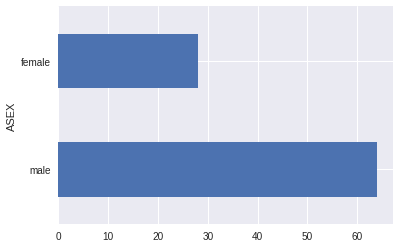

In [68]:
n='ASEX'
pivt = df.pivot_table(values='AAGE',index=[n],columns=['INCBAND'],aggfunc='count')
pivt['T'] = pivt['A'] + pivt['B']
pivt['A/T'] = round(pivt['A']/pivt['T']*100)
pivt.sort_values(by='A/T', ascending=False, inplace=True)
plt.figure()
pivt['A/T'].plot.barh()

### Keep only the variables that will feed into the model

In [69]:
df = df[['AAGE', 'WKSWORK', 'AHGA', 'AMARITL', 'ASEX', 'HHDREL', 'INCBAND']]

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24761 entries, 4699 to 199509
Data columns (total 7 columns):
AAGE       24761 non-null int64
WKSWORK    24761 non-null object
AHGA       24761 non-null object
AMARITL    24761 non-null object
ASEX       24761 non-null object
HHDREL     24761 non-null object
INCBAND    24761 non-null object
dtypes: int64(1), object(6)
memory usage: 1.5+ MB


## Convert categorical variables into dummies

In [71]:
# These variables will be turned into dummies: 'WKSWORK', 'AHGA', 'AMARITL', 'ASEX', 'HHDREL'
WKSWORK = pd.get_dummies(df['WKSWORK'],drop_first=True)
AHGA = pd.get_dummies(df['AHGA'],drop_first=True)
AMARITL = pd.get_dummies(df['AMARITL'],drop_first=True)
ASEX = pd.get_dummies(df['ASEX'],drop_first=True)
HHDREL = pd.get_dummies(df['HHDREL'],drop_first=True)

In [72]:
df.drop(['WKSWORK', 'AHGA', 'AMARITL', 'ASEX', 'HHDREL'],axis=1,inplace=True)

In [73]:
df = pd.concat([df,WKSWORK,AHGA,AMARITL,ASEX,HHDREL],axis=1)

In [74]:
df['INCBAND'].replace(['A', 'B'], [1, 0], inplace=True)

In [75]:
df.head()

,AAGE,INCBAND,1_51,52,assoc_degree,bachelor,below_hschool,colg_nodegree,hschool_grad,master,married,no_spouse,male,householder,other_nonhholder,spouse
4699,67,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
60944,47,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0
74566,69,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
157871,30,0,1,0,0,0,0,0,1,0,1,0,1,1,0,0
108832,26,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1


## Train Test Split

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('INCBAND',axis=1), 
                                                    df['INCBAND'], test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [80]:
predictions = logmodel.predict(X_test)

## Evaluation

In [81]:
from sklearn.metrics import classification_report

In [82]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.84      0.77      0.81      3779
          1       0.78      0.85      0.81      3650

avg / total       0.81      0.81      0.81      7429



In [121]:
# Area under the ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,predictions)

0.81113543845403768

In [83]:
from sklearn.metrics import confusion_matrix

In [97]:
conf_matrix = confusion_matrix(y_test,predictions)
conf_matrix

array([[2921,  858],
       [ 550, 3100]])

In [98]:
tn, fp, fn, tp = conf_matrix.ravel()
(tn, fp, fn, tp)

(2921, 858, 550, 3100)

In [119]:
# Accuracy - How many cases were correctly predicted
accuracy = (tp+tn)/(tp+tn+fp+fn)
accuracy

0.81047247274195722

In [112]:
# Precision - out of the predicted in band 'A' how many where actually in band 'A'
precision = tp/(tp+fp)
precision

0.78322385042950982

In [113]:
# out of the predicted in band 'B' how many where actually in band 'B'
tn/(tn+fn)

0.84154422356669545

In [114]:
# Recall/Sensitivity = True positive rate = Out of those in band 'A' how many were correctly predicted in band 'A'
recall = tp/(tp+fn)
recall

0.84931506849315064

In [115]:
# Specificity = True negative rate = Out of those in band 'B' how many were correctly predicted in band 'B'
specificity = tn/(tn+fp)
specificity

0.77295580841492462

In [116]:
# 1-specificity = False positive rate = Out of those in band 'B' how many were wrongly predicted in band 'A'
1-specificity

0.22704419158507538

In [110]:
df.columns

Index(['AAGE', 'INCBAND', '1_51', '52', 'assoc_degree', 'bachelor',
       'below_hschool', 'colg_nodegree', 'hschool_grad', 'master', 'married',
       'no_spouse', 'male', 'householder', 'other_nonhholder', 'spouse'],
      dtype='object')

In [108]:
logmodel.coef_

array([[ 0.03450581,  1.41227233,  2.44142951, -2.27901281, -1.30370322,
        -4.0138853 , -2.36728083, -2.94494483, -0.65920353,  0.03882109,
        -0.3538433 ,  1.14534228,  1.40255733,  0.61111008,  0.89360477]])

In [109]:
logmodel.intercept_

array([-3.07924308])